# LogisticRegression

In [40]:
#ml_env

In [41]:
import numpy as np
import kagglehub
import shutil
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Ensures plots display inside notebook

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [4]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

my_path = "./pima-indians-diabetes-database.csv"  

# Move dataset files
for file in os.listdir(path):
    shutil.copy(os.path.join(path, file), my_path)

print("Dataset copied to:", my_path)

Dataset copied to: ./pima-indians-diabetes-database.csv


In [5]:
df = pd.read_csv("C:/Users/Sina Najafi/DATA_ANALYSIS/pima-indians-diabetes-database.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape  # rows and columns
df.info() # data types, missing values
df.describe() # summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum() # To check missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

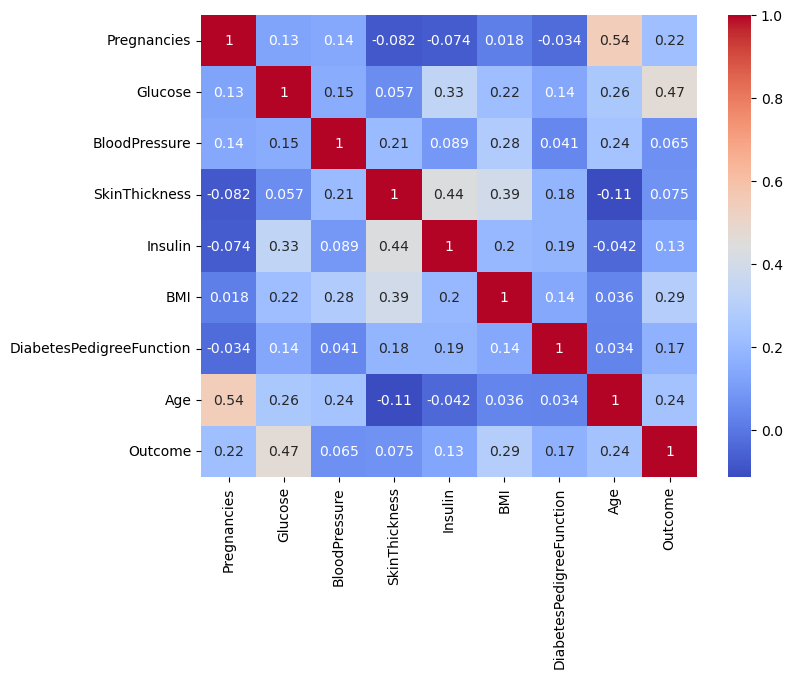

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [9]:
df['Outcome'].value_counts(normalize=True) # To check target balance 

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

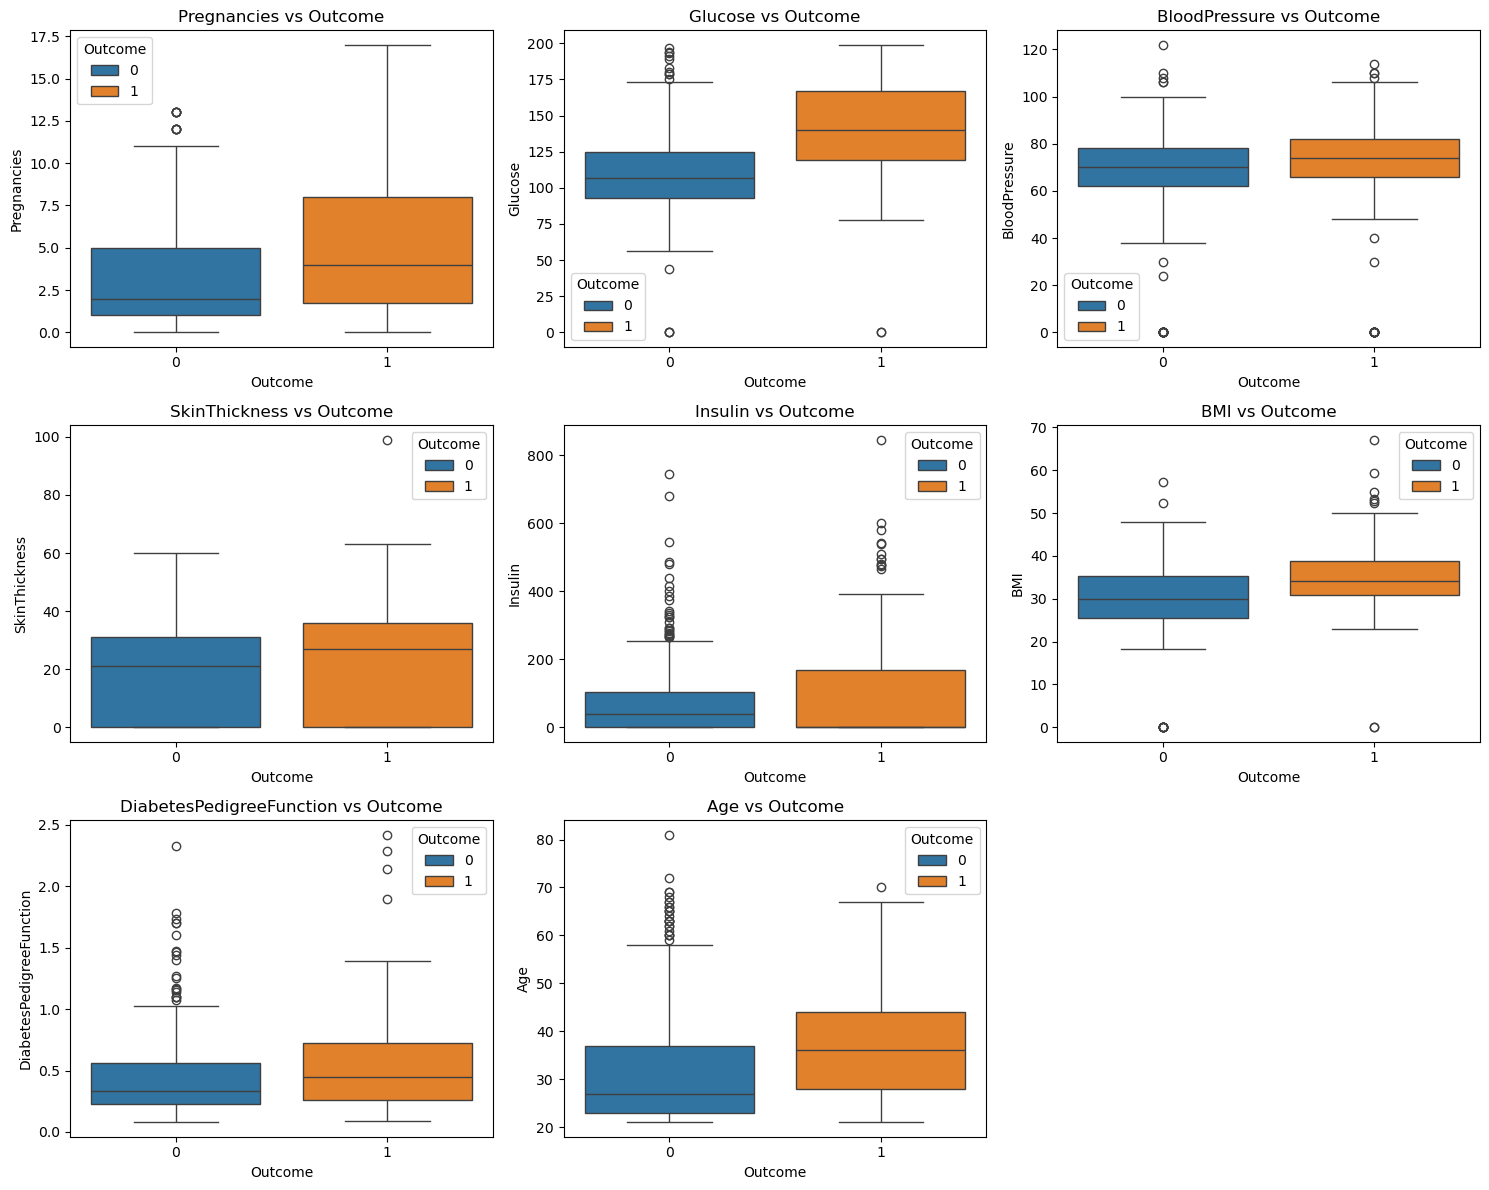

In [10]:
# To see which features separate diabetic vs. non-diabetic patients.
# Get feature names (exclude target column "Outcome")
features = df.columns[:-1]  

# Set up subplot grid (3 rows × 3 columns, since 8 features)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  

# Flatten axes for easy iteration
axes = axes.flatten()

df["Outcome"] = df["Outcome"].astype(int)

for i, col in enumerate(features):
    sns.boxplot(x="Outcome", hue="Outcome", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Outcome")

# Hide any unused subplot 
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# LogisticRegression

In [43]:
# Features (all except target)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# random_state=42 makes the split reproducible (same split every time).
# stratify=y ensures class distribution (0 vs 1) remains balanced in both train and test sets.

# Then scale using only training data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# Using regularization (which sklearn does by default) — that stabilizes coefficients even when features vary a bit in scale

In [12]:
# Create model
log_reg = LogisticRegression(max_iter=1000)

# Train
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



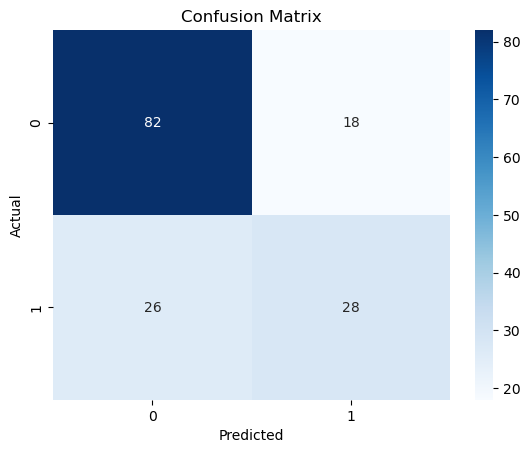

In [13]:
# Predictions
y_pred = log_reg.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Top-left: True Negatives (actual 0, predicted 0).

# Top-right: False Positives (actual 0, predicted 1).

# Bottom-left: False Negatives (actual 1, predicted 0).

# Bottom-right: True Positives (actual 1, predicted 1).

In [14]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC–AUC Score:", auc)

ROC–AUC Score: 0.8229629629629629


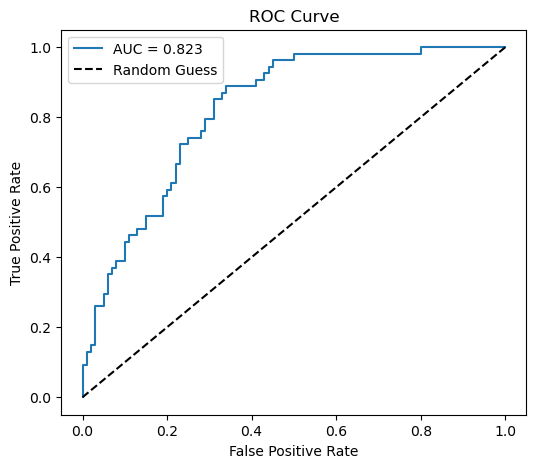

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Random Forest

In [35]:
# Create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # number of trees
    random_state=42,
    class_weight="balanced"  # helps with class imbalance
)

# Train on training data
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.7792207792207793

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



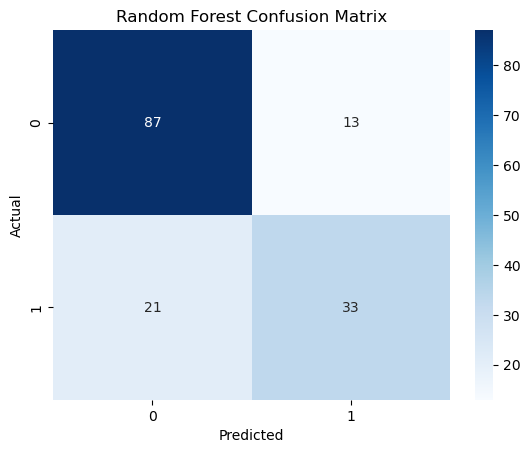

In [36]:
# Predict
y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [37]:
y_pred_proba4 = rf_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba4)
print("ROC–AUC Score:", auc)

ROC–AUC Score: 0.8259259259259261


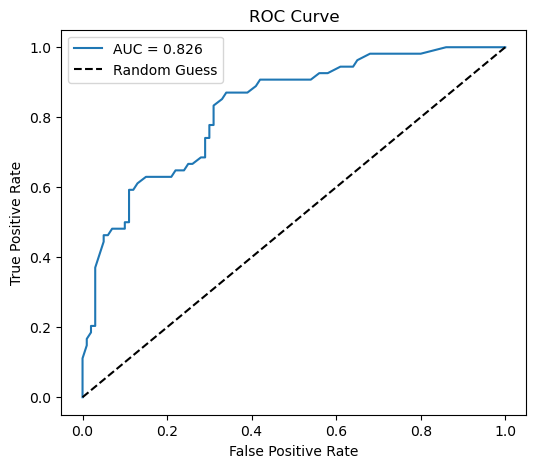

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba4)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance

C:\Users\Sina Najafi\AppData\Local\Temp\ipykernel_1068\3735485706.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette=palette)


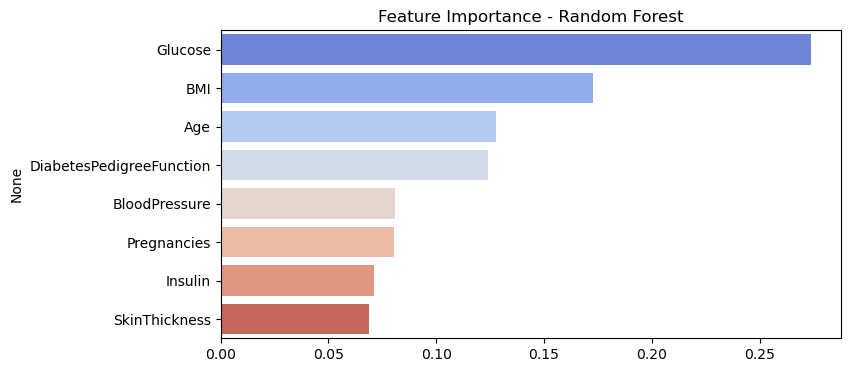

In [15]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
palette = sns.color_palette("coolwarm", len(importances))

plt.figure(figsize=(8, 4))
sns.barplot(x=importances[indices], y=X.columns[indices], palette=palette)
plt.title("Feature Importance - Random Forest")
plt.show()

# SMOTE

In [19]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [20]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_raw, y_train_raw)

print("Before SMOTE:")
print(y_train_raw.value_counts())
print("\nAfter SMOTE:")
print(y_train_balanced.value_counts())

Before SMOTE:
Outcome
0    400
1    214
Name: count, dtype: int64

After SMOTE:
Outcome
0    400
1    400
Name: count, dtype: int64


# RF_SMOTE

In [22]:
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
)
rf_balanced.fit(X_train_balanced, y_train_balanced)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
y_pred_balanced = rf_balanced.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))


Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       100
           1       0.64      0.72      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154


Confusion Matrix:
 [[78 22]
 [15 39]]


In [24]:
y_pred_proba1 = rf_balanced.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba1)
print("ROC–AUC Score:", auc)

ROC–AUC Score: 0.8273148148148147


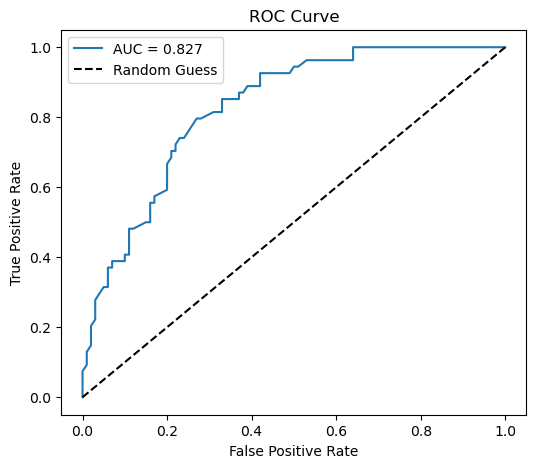

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Log_reg SMOTE

Accuracy: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



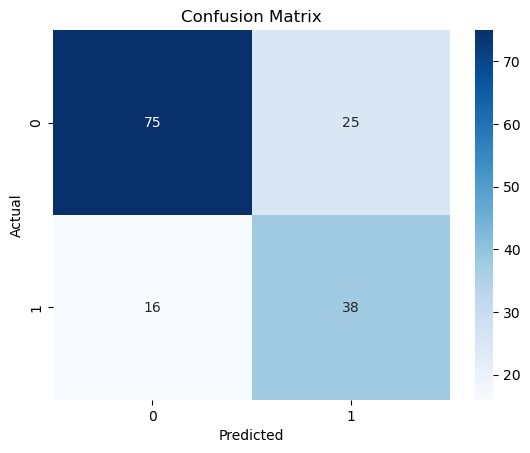

In [26]:
# Create model
log_reg1 = LogisticRegression(max_iter=1000)

# Train
log_reg1.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred = log_reg1.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [27]:
y_pred_proba2 = log_reg1.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba2)
print("ROC–AUC Score:", auc)

ROC–AUC Score: 0.8225925925925925


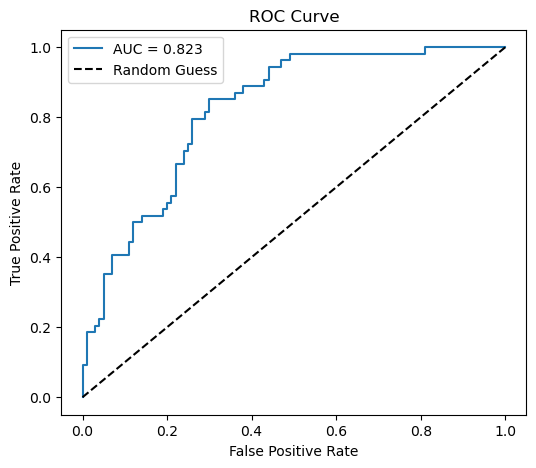

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# XGBoost (Extreme Gradient Boosting)

In [29]:
# Compute imbalance ratio
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print("scale_pos_weight:", ratio)

scale_pos_weight: 1.8691588785046729


In [30]:
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    scale_pos_weight=ratio,
    random_state=42,
    eval_metric="logloss"
)

In [31]:
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy: 0.7402597402597403

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       100
           1       0.62      0.67      0.64        54

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.74      0.74       154


 Confusion Matrix:
 [[78 22]
 [18 36]]


In [32]:
y_pred_proba3 = xgb_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba3)
print("ROC–AUC Score:", auc)

ROC–AUC Score: 0.8274074074074074


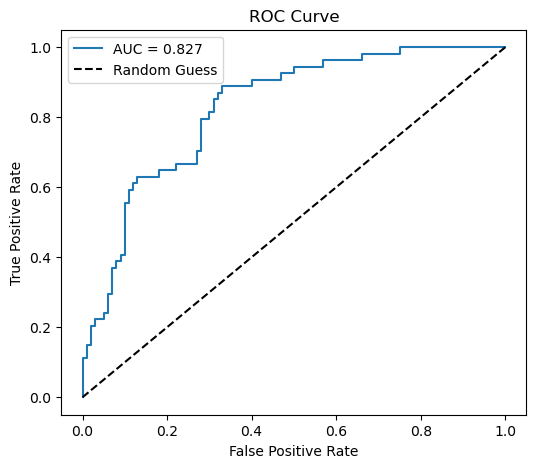

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba3)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Evaluation

In [39]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.733, 0.759, 0.740],
    "Precision (1)": [0.60, 0.64, 0.62],
    "Recall (1)": [0.70, 0.72, 0.67],
    "F1-score (1)": [0.65, 0.68, 0.64],
    "AUC": [0.822, 0.827, 0.827]
}

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy,Precision (1),Recall (1),F1-score (1),AUC
0,Logistic Regression,0.733,0.60,0.70,0.65,0.822
1,Random Forest,0.759,0.64,0.72,0.68,0.827
2,XGBoost,0.740,0.62,0.67,0.64,0.827
